In [1]:
import pandas as pd
import seaborn as sns

# Helper Method

In [2]:
def map_target(category):
    mappings = {'DOKOL': 0, 'SAFAVI': 1, 'ROTANA': 2, 'DEGLET': 3, 
                'SOGAY': 4, 'IRAQI': 5, 'BERHI': 6}
    
    return mappings[category]

# Importing dataset

In [3]:
dataset = pd.read_excel('Date_Fruit_Datasets.xlsx')

# Target Variables

In [4]:
print(dict(dataset['Class'].value_counts()))

{'DOKOL': 204, 'SAFAVI': 199, 'ROTANA': 166, 'DEGLET': 98, 'SOGAY': 94, 'IRAQI': 72, 'BERHI': 65}


# Numerical Features

## Missing Features

In [5]:
print(dataset.isnull().sum())

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


# Splitting dataset

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Class'], axis=1),
                                                    dataset['Class'],
                                                    test_size = 0.3,
                                                    random_state = 24)


In [7]:
y_train = y_train.apply(map_target)
y_test = y_test.apply(map_target)

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating Model

In [9]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state = 24, multi_class='ovr')
logit.fit(X_train, y_train)

pred_train = logit.predict(X_train)
pred_train_probs = logit.predict_proba(X_train)

pred_test = logit.predict(X_test)
pred_test_probs = logit.predict_proba(X_test)

# Evaluation Metrics

In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score

print('train roc-auc: {}'.format(roc_auc_score(y_train, pred_train_probs, multi_class='ovr')))
print('train accuracy: {}'.format(accuracy_score(y_train, pred_train)))
print()
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred_test_probs, multi_class='ovr')))
print('test accuracy: {}'.format(accuracy_score(y_test, pred_test)))

train roc-auc: 0.9958735737256996
train accuracy: 0.9426751592356688

test roc-auc: 0.9869963982753122
test accuracy: 0.9


Confusion Matrix for train set: 
 AxesSubplot(0.125,0.125;0.62x0.755)


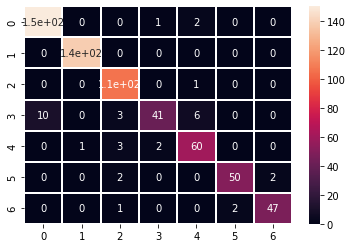

In [11]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print('Confusion Matrix for train set: \n', sns.heatmap(confusion_matrix(y_train, pred_train), annot=True, linewidths=0.4))

Confusion Matrix for test set: 
 AxesSubplot(0.125,0.125;0.62x0.755)


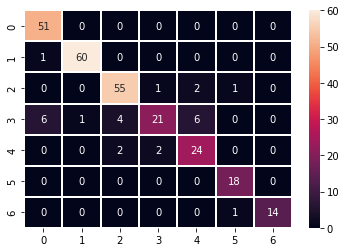

In [12]:
print('Confusion Matrix for test set: \n', sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, linewidths=0.4))

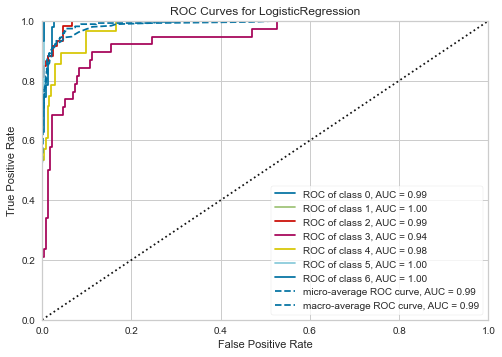

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:
# Plotting ROC-AUC
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logit, classes=[0, 1, 2, 3, 4, 5, 6])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()
